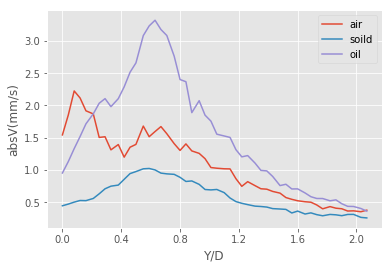

0.08
0.66


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arrange_data(data_name):
    df=pd.read_csv(data_name)
    df=df.drop(0)
    df=df.dropna(axis=1)
    df["Y"]=df["Y"].astype(float)
    df["Y"]=(df["Y"]*100).astype(int).astype(float)/100
    df["X"]=df["X"].astype(float)
    df["X"]=(df["X"]*100).astype(int).astype(float)/100
    df['absU']=df["U"].abs()
    df['absV2']=df["V"].abs()
    df_x=df.groupby("Y").mean().drop('X',axis=1) 
    return df_x

airdata=arrange_data('air.csv')
soilddata=arrange_data('solid.csv')
oildata=arrange_data('oil.csv')


plt.style.use('ggplot')
fig,ax=plt.subplots()

plt.plot(airdata.index,airdata["absV"],label="air")
plt.plot(airdata.index,soilddata["absV"],label="soild")
plt.plot(airdata.index,oildata["absV"],label="oil")

ax.legend()

ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set_xlabel("Y/D")
ax.set_ylabel("absV"+'(mm/s)')

plt.show()

print(airdata["absV"].idxmax())
print(oildata["absV"].idxmax())

